In [1]:
import sys
import pandas as pd
sys.path.append('../Scripts')
from RFMSProcessor import RFMSProcessor

df=pd.read_csv('../Data/final.csv')

In [2]:
# Initialize the RFMSProcessor
rfms_processor = RFMSProcessor(df)

1. RFMS SCORE(Recency: Frequency: Monetary: Satisfaction:  )
---

These metrics are often combined into a scoring system where customers can be segmented based on their RFMS scores.

Typically, customers are classified into different segments such as "High Value," "At Risk," or "Lost" based on thresholds for each metric.

In [3]:
# Calculate RFMS scores
rfms_processor.calculate_rfms()

RFMS DataFrame:
         CustomerId  Recency  Frequency  Monetary        Score
0     CustomerId_1     2144          1  0.400290 -2142.999600
1    CustomerId_10     2144          1  0.400290 -2142.999600
2  CustomerId_1001     2150          5  2.243797 -2144.997756
3  CustomerId_1002     2087         11  3.975634 -2075.996024
4  CustomerId_1003     2072          6  2.591871 -2065.997408


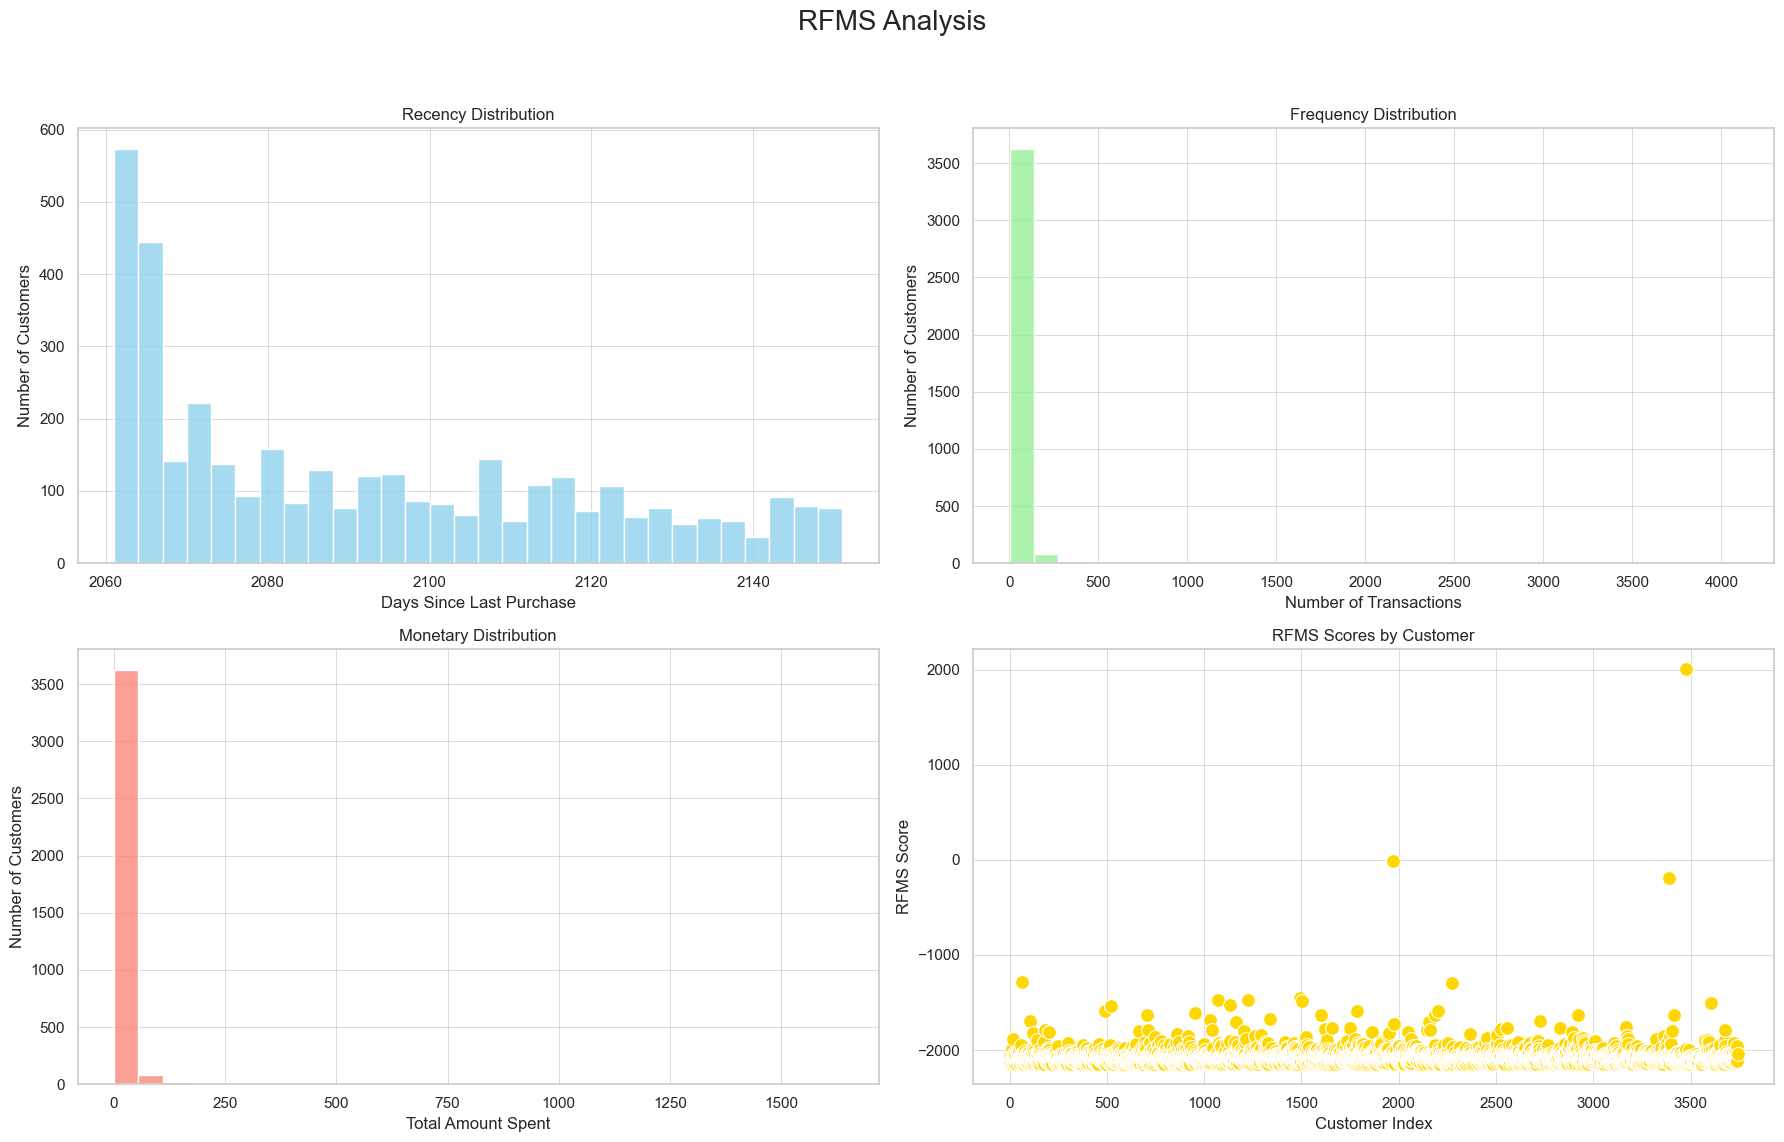

In [4]:

# Visualize RFMS scores
rfms_processor.visualize_rfms()

2. **Classification Logic:**
---

**Good Users:**
A customer is labeled as Good if:

            Their Recency is less than or equal to 2100 days (i.e., relatively recent transactions).

            Their Monetary value is greater than or equal to 8.41 units (i.e., valuable based on their total spend).

**Bad Users:**
A customer is labeled as Bad if either of the following conditions are met:

            Their Recency is greater than 2100 days (i.e., no recent transactions).

            Their Monetary value is less than 8.41 units (i.e., low spenders).

In [5]:
# Classify users based on defined thresholds
rfms_processor.classify_users(monetary_threshold=8.41, recency_threshold=2100)
print(rfms_processor.rfms_df[['Recency', 'Monetary']].describe())

User labeling completed.
        CustomerId  Recency  Monetary UserLabel
0     CustomerId_1     2144  0.400290       Bad
1    CustomerId_10     2144  0.400290       Bad
2  CustomerId_1001     2150  2.243797       Bad
3  CustomerId_1002     2087  3.975634       Bad
4  CustomerId_1003     2072  2.591871       Bad

User Label Distribution:
 UserLabel
Bad     2906
Good     836
Name: count, dtype: int64
           Recency     Monetary
count  3742.000000  3742.000000
mean   2091.625601    10.233180
std      27.131007    37.844064
min    2061.000000     0.111899
25%    2066.000000     0.993960
50%    2085.000000     2.751206
75%    2114.000000     8.407923
max    2151.000000  1637.587107


d:\10 ACADAMY KIFIYA\Week_6\Bati-Bank-Credit-Scoring-Model\notebooks\../Scripts\RFMSProcessor.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.rfms_df, x='UserLabel', palette='pastel')


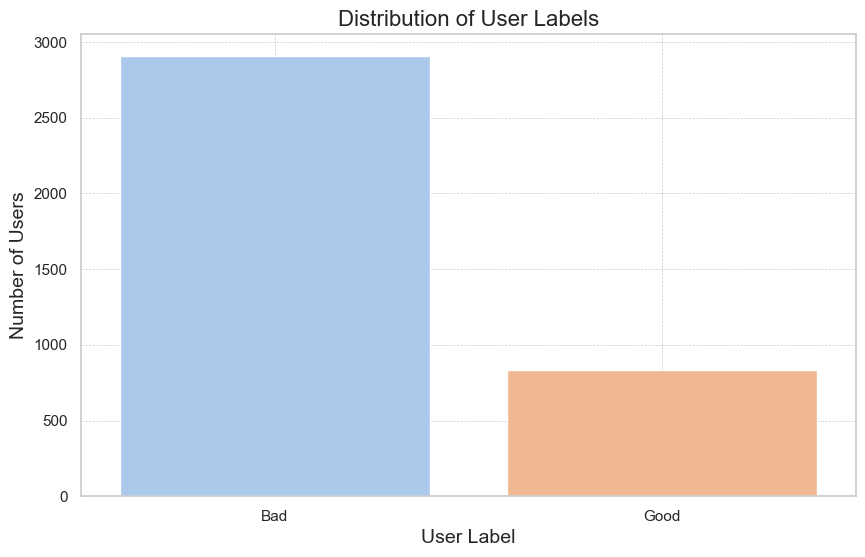

In [6]:
rfms_processor.visualize_user_labels()

In [8]:
rfms_processor.save_rfms_to_csv('../Data/rfms_final_data.csv')
df=pd.read_csv('../Data/rfms_final_data.csv')
df

RFMS DataFrame successfully saved to ../Data/rfms_final_data.csv


,CustomerId,Recency,Frequency,Monetary,Score,UserLabel
0,CustomerId_1,2144,1,0.400290,-2142.999600,Bad
1,CustomerId_10,2144,1,0.400290,-2142.999600,Bad
2,CustomerId_1001,2150,5,2.243797,-2144.997756,Bad
3,CustomerId_1002,2087,11,3.975634,-2075.996024,Bad
4,CustomerId_1003,2072,6,2.591871,-2065.997408,Bad
...,...,...,...,...,...,...
3737,CustomerId_992,2066,6,2.570001,-2059.997430,Bad
3738,CustomerId_993,2086,5,2.254234,-2080.997746,Bad
3739,CustomerId_994,2062,101,40.833827,-1960.959166,Good
3740,CustomerId_996,2128,17,8.204591,-2110.991795,Bad
